In [1]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pprint import pprint

In [2]:
# https://pybonacci.org/2012/10/15/el-salto-de-felix-baumgartner-en-python/

# https://www.20minutos.es/deportes/noticia/felix-baumgartner-traje-ansiedad-creer-salto-1781818/0/
m = 115 # kg

# https://enjoy.es/magazine/2022/10/01/historia-del-deporte-extremo-10-anos-del-salto-de-felix-baumgartner/
Vmax = 1357.6 # km/h

# https://es.wikipedia.org/wiki/Red_Bull_Stratos
Ttotal = 260 # s

y0 = 39068 # m

CD = 0.4

A = 1.0 # m**2

g = -9.81 # m/s**2

def rho(h): # h en Km
    rho_0 = 1.225 # g/dm**3
    h0 = 0 # km
    H = 8.5 # km
    return rho_0 * exp( - (h - h0) / H ) # g/dm**3

pprint(Vmax / 3.6)

377.1111111111111


In [3]:
t = 0
y = y0 # Height
v = 0 # Speed

dt = 0.001 # s

datos_y = []
datos_v = []
datos_t = []

while True:
    #pprint(f"t={t}, y={y}, v={v}")

    y_prev = y
    v_prev = v

    D = 1 / 2 * rho(y_prev / 1000) * v_prev**2 * CD * A

    F = g * m + D
    a = F / m
    v = v_prev + a * dt
    y = y_prev + v_prev * dt
    t += dt

    if y < 0:
        break

    datos_y.append(y)
    datos_v.append(abs(v))
    datos_t.append(t)


353.56606925620554


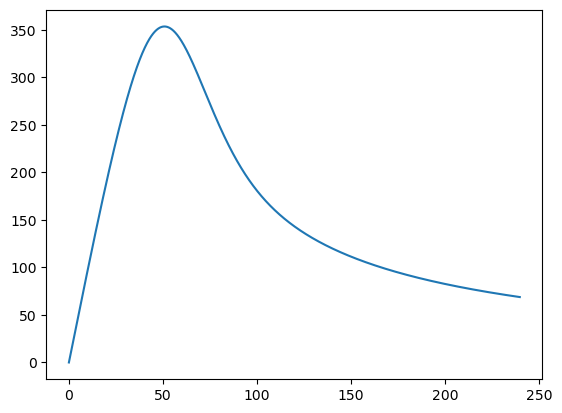

In [4]:
f = plt.figure()
plt.plot(datos_t, datos_v)
pprint(max(datos_v))

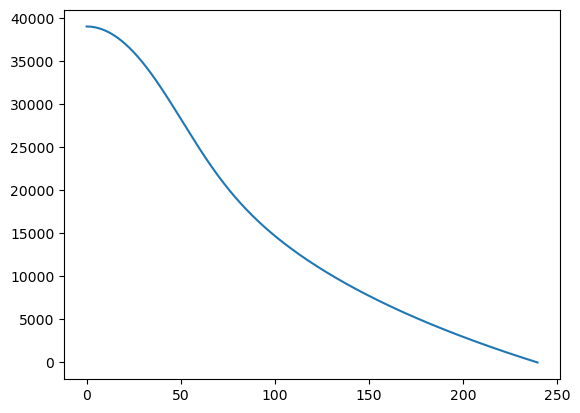

In [5]:
f = plt.figure()
plt.plot(datos_t, datos_y)

In [6]:
pprint(datos_v[-1] * 3.6) # Valocidad de aterizaje en Km/h

# Aterrizaje en paracaidas: 250 km/h
# https://everent.es/cosas-que-debes-saber-antes-de-saltar-en-paracaidas/


247.83928332118262


Usando numpy.solve_ivp

F = -g*m + D
D = 1/2 * rho(y / 1000) * v**2 * CD * A = D(y, v)

y''(t) = F/m

Condiciones iniciales: y(0) = y0,  y'(0) = v0

El estado en cada instante está representado por el vector X(t) = [ x0, x1 ] = [ y(t), v(t) ]

Las Ecuaciones Diferenciales que rigen el proceso son:

x0'(t) = y'(t) = x1(t)
x1'(t) = y''(t) = -g + D(y, v) / m = D(x0, x1) / m - g

In [7]:
from numpy import * 
from scipy.integrate import solve_ivp


In [8]:
# https://www.20minutos.es/deportes/noticia/felix-baumgartner-traje-ansiedad-creer-salto-1781818/0/
m = 115 # kg

# https://enjoy.es/magazine/2022/10/01/historia-del-deporte-extremo-10-anos-del-salto-de-felix-baumgartner/
Vmax = 1357.6 # km/h

# https://es.wikipedia.org/wiki/Red_Bull_Stratos
Ttotal = 260 # s

y0 = 39068 # m
v0 = 0 # m/s

CD = 0.4

A = 1.0 # m**2

g = -9.81 # m/s**2

def rho(h): # h en Km, results in g/l = g/dm**3 = kg/m**3
    rho_0 = 1.225 # g/dm**3 = kg/m**3
    h0 = 0 # km
    H = 8.5 # km
    return rho_0 * exp( - (h - h0) / H ) # g/dm**3

In [9]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
# https://stackoverflow.com/questions/59877836/an-implementation-of-solve-ivp-ode-solver
# https://stackoverflow.com/questions/61429505/is-it-possible-to-access-the-solution-array-at-every-time-step-using-solve-ivp

def diff_eq(t, X):
    D = 1 / 2 * rho(X[0] / 1000) * X[1]**2 * CD * A
    return [ X[1], D / m + g ]

def hit_ground(t, y):
    return y[0]

hit_ground.terminal = True

hit_ground.direction = -1

t_eval = linspace(0, 1000, 1001)

sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=t_eval, events=hit_ground)

print(sol.t_events)

[array([239.59041776])]


In [10]:
pprint(sol.t.shape)
pprint(sol.y.shape)

(240,)
(2, 240)


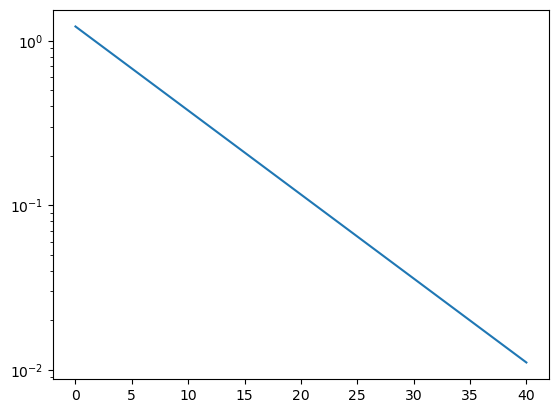

In [11]:
f = plt.figure()
hs = linspace(0, 40, 400)
plt.plot(hs, vectorize(rho)(hs))
#plt.xscale("log")
plt.yscale("log")

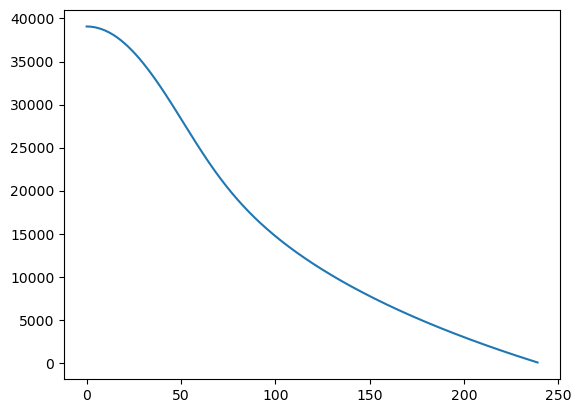

In [12]:
f = plt.figure()
plt.plot(sol.t, sol.y[0])

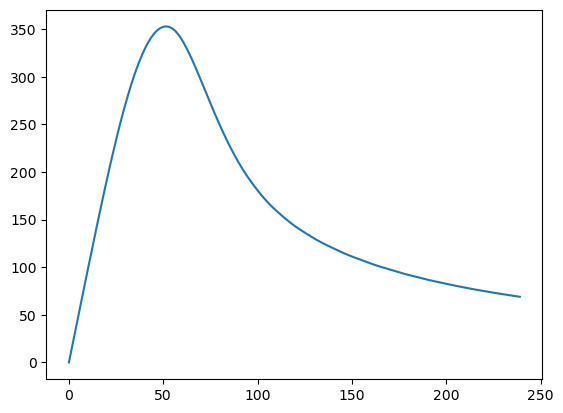

In [13]:
f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]))

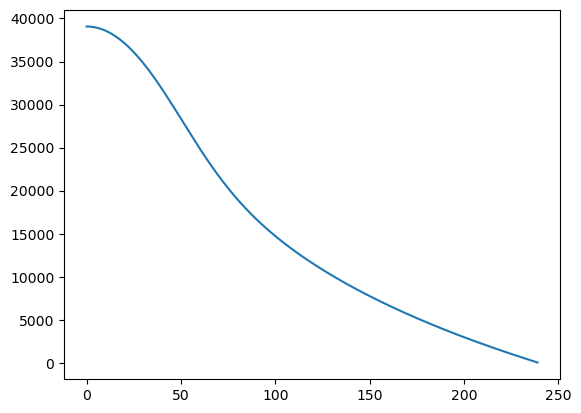

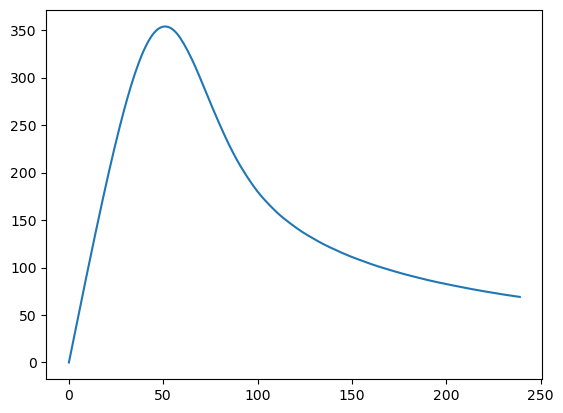

In [14]:
sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=linspace(0, 1000, 1001), events=hit_ground, method='RK23')
f = plt.figure()
plt.plot(sol.t, sol.y[0])
f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]))

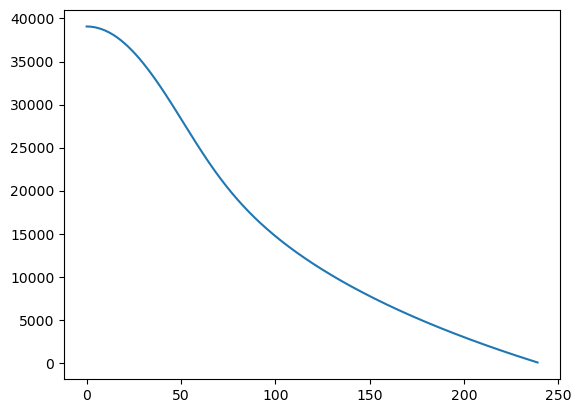

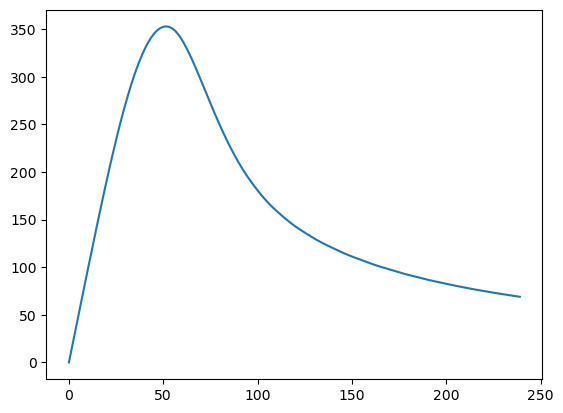

In [15]:
sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=linspace(0, 1000, 1001), events=hit_ground, method='RK45')
f = plt.figure()
plt.plot(sol.t, sol.y[0])
f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]))

In [16]:
from numpy import * 
from scipy.integrate import solve_ivp
from aerocalc import std_atm


In [17]:
# https://www.20minutos.es/deportes/noticia/felix-baumgartner-traje-ansiedad-creer-salto-1781818/0/
m = 115 # kg

# https://enjoy.es/magazine/2022/10/01/historia-del-deporte-extremo-10-anos-del-salto-de-felix-baumgartner/
Vmax = 1357.6 # km/h

# https://es.wikipedia.org/wiki/Red_Bull_Stratos
Ttotal = 260 # s

y0 = 39068 # m
v0 = 0 # m/s

CD = 0.4

A = 1.0 # m**2

g = -9.81 # m/s**2

def rho_simple(h): # h en Km, results in g/l = g/dm**3 = kg/m**3
    rho_0 = 1.225 # g/dm**3 = kg/m**3
    h0 = 0 # km
    H = 8.5 # km
    return rho_0 * exp( - (h - h0) / H ) # g/dm**3

def rho(h): # h en Km, results in kg/l = kg/dm**3
    return std_atm.alt2density(h * 1000, alt_units='m', density_units='kg/m**3')

def diff_eq(t, X):
    D = 1 / 2 * rho(X[0] / 1000) * X[1]**2 * CD * A
    return [ X[1], D / m + g ]

def hit_ground(t, y):
    return y[0]

hit_ground.terminal = True

hit_ground.direction = -1

t_eval = linspace(0, 1000, 1001)

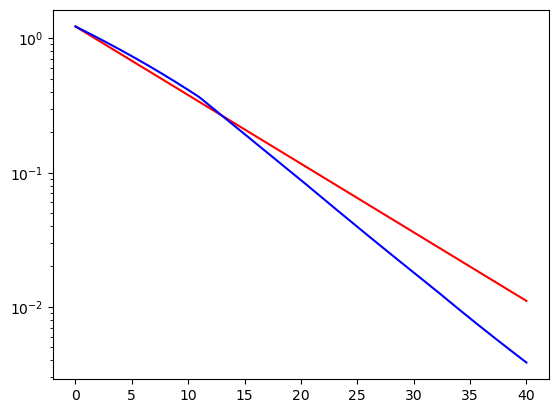

In [18]:
f = plt.figure()
hs = linspace(0, 40, 400)

plt.plot(hs, vectorize(rho_simple)(hs), 'r')
#plt.xscale("log")
plt.yscale("log")

plt.plot(hs, vectorize(rho)(hs), 'b')
#plt.xscale("log")
plt.yscale("log")

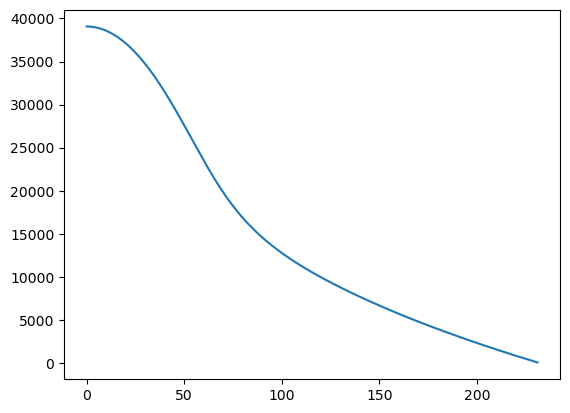

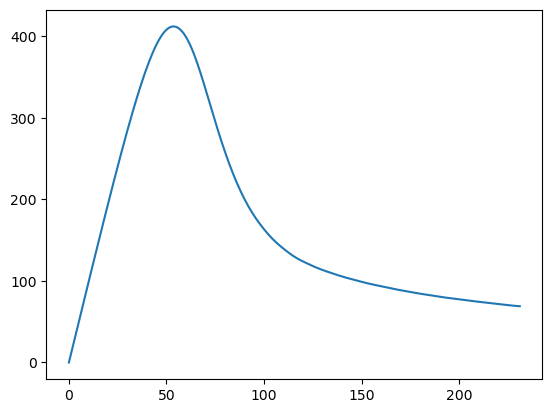

In [19]:
sol = solve_ivp(diff_eq, [0, 1000], [y0, v0], t_eval=linspace(0, 1000, 1001), events=hit_ground)

f = plt.figure()
plt.plot(sol.t, sol.y[0])
f = plt.figure()
plt.plot(sol.t, abs(sol.y[1]))